# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

For single agent Reacher_NoVis [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/one_agent/Reacher_Linux_NoVis.zip)

For multiagent Reacher_NoVis [click here](https://s3-us-west-1.amazonaws.com/udacity-drlnd/P2/Reacher/Reacher_Linux_NoVis.zip)

In [2]:
env = UnityEnvironment(file_name='env2/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


In [5]:
states.shape

(20, 33)

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [6]:
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.1629999963566661


Note that the environment is setup such that it necessarily monitors the agents for 1000 steps and then terminates. Thus all the agents get a done at exactly the same time. This can also be verified by explicitly counting the number of steps executed before the episode ends. This always comes out to be 1000. Let us see this explicitly in the following code cell (we will also tweak the condition to the end the episode to be given by when all the agents are done, though this will not matter): 

In [6]:
# count the number of steps in 5 episodes
def check_num_steps(num_episodes = 5):
    for _ in range(num_episodes):
        env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        steps = 0
        while True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            steps+=1
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.all(dones): 
                break
        print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
        print('number of steps executed in the episode: {}'.format(steps))

check_num_steps()        

Total score (averaged over agents) this episode: 0.0874999980442226
number of steps executed in the episode: 1001
Total score (averaged over agents) this episode: 0.12599999718368055
number of steps executed in the episode: 1001
Total score (averaged over agents) this episode: 0.08399999812245369
number of steps executed in the episode: 1001
Total score (averaged over agents) this episode: 0.1114999975077808
number of steps executed in the episode: 1001
Total score (averaged over agents) this episode: 0.14699999671429395
number of steps executed in the episode: 1001


In [7]:
type(states)

numpy.ndarray

When finished, you can close the environment.

In [8]:
env.close()

In [9]:
len(rewards)

20

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### the flow of training will be as follows:

Note that episodes come to an end after a fixed time. Therefore there is no terminal state in the game. Hence, there are no actions so bad taht they will lead the agent to a terminal state causing it to finish earlier than it should. The only categorization of actions is whether they help it maintain its position in the goal or not. Had the time not run out, the action could have scored better or worse. In this way I feel that this task is similar to being a continuous task with the hard-cut off on time making it episodic. I therefore feel that we should not use dones for evaluating the target value in the TD-step. In concurrence with this idea, I will only collect experiences where the neither of the states were the last states of that episode. This also implies that I will not include dones in the memory

    repeat for num_episodes
      reset the env.
      obtain the initial states
      for the first roll_out - 1 steps in each episode
        obtain actions for the current states
        obtain the rewards 
        obtain dones
        concatenate the current states, actions, and rewards 
        push each row of the concatenated array into its corresponding deque
        obtain the next states
        states = next_states
   
      for all subsequent steps in each episode i.e. until done
        obtain actions for the current states
        obtain the rewards 
        obtain dones
        if not done then 
           concatenate the current states, actions and rewards 
           push each row of the concatenated array into its corresponding deque
           pass the list of deques to the agent
           agent takes a step to put the experiences in the buffer and learn
           obtain the next states
           states = next_states
        else
           break to start a new episode
       

In [6]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

In [7]:
from DDPG_Agent import Agent

Episode 100	Average Score: 1.11
Episode 200	Average Score: 8.05
Episode 295	Average Score: 30.13
Environment solved in 195 episodes!	Average Score: 30.13


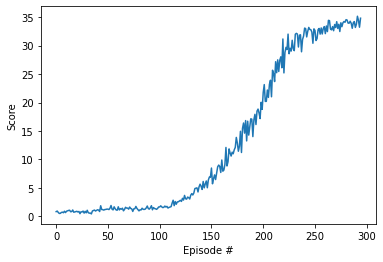

In [8]:
def ddpg(n_episodes=2000, roll_out = 5):
    """DDPG
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
    """
    ep_scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    experience_windows = [deque(maxlen = roll_out) for _ in range(num_agents)]
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations            # get the current state
        scores = np.zeros(num_agents)
        for step in range(roll_out-1):
            actions = agent.act(states) # select an action (for each agent)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            #dones = env_info.local_done                        # see if episode finished
            #if np.any(dones):
            #    break
            single_step_mem = np.concatenate((states, 
                                              actions,
                                              np.array(rewards).reshape(-1,1)), 
                                             axis = 1)
            for idx in range(num_agents):
                experience_windows[idx].append(single_step_mem[idx])
        
            scores += rewards                         # update the score (for each agent)
            states = next_states
        
        
        while True:
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]        # send the action to the environment
            next_states = env_info.vector_observations      # get the next state
            rewards = env_info.rewards                      # get the reward
            dones = env_info.local_done                     # see if episode has finished
            scores += rewards
            if np.any(dones):                               # if finished then move to next episode
                break
            single_step_mem = np.concatenate((states, 
                                              actions,
                                              np.array(rewards).reshape(-1,1)), 
                                             axis = 1)
            for idx in range(num_agents):
                experience_windows[idx].append(single_step_mem[idx])
                
            agent.step(experience_windows)
            states = next_states
        
        scores_window.append(np.mean(scores))       # save most recent scores averaged over the agents
        ep_scores.append(np.mean(scores))           # save most recent scores averaged over the agents
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            # print('memory size: {}'.format(len(agent.memory)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save({'local_actor': agent.local_actor.state_dict(), 
                        'local_critic': agent.local_critic.state_dict()}, 'checkpoint.pth')
            break
    return ep_scores

roll_out = 2
agent = Agent(n_states = state_size, n_actions = action_size, roll_out = roll_out,  
              update_interval = 3, seed = 10, lr_actor = 1e-4,  lr_critic = 1e-4)
scores = ddpg(n_episodes = 500, roll_out = roll_out)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: 1.44
Episode 200	Average Score: 21.17
Episode 235	Average Score: 30.11
Environment solved in 135 episodes!	Average Score: 30.11


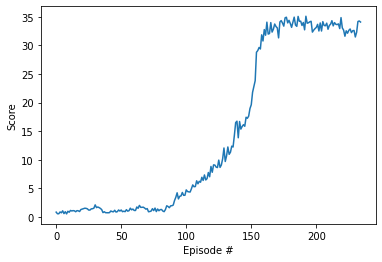

In [9]:
# Repeat the above experiment with a roll_out = 5
roll_out = 5
agent = Agent(n_states = state_size, n_actions = action_size, roll_out = roll_out,  
              update_interval = 3, seed = 10, lr_actor = 1e-4,  lr_critic = 1e-4)
scores = ddpg(n_episodes = 500, roll_out = roll_out)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

We see that our agent is able to learn faster with a roll_out = 5 than with a roll_out = 2. This shows the efficacy of n-step bootstrap. Also recall that in a seperate project we had implemented a simple DDPG agent (with a roll_out = 5) to solve the same problem, which took 375 episodes to solve the environment. We see that here it takes only 135 episodes, even though here both our agent and the critic have a smaller number of parameters. This is clearly indicative of the power of the distributional methodologies. 

### The learned Q-value Distribution

In [12]:
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt

In [6]:
from DDPG_Agent import Agent

In [8]:
roll_out = 5
agent = Agent(n_states = state_size, n_actions = action_size, roll_out = roll_out,  
              update_interval = 3, seed = 10, lr_actor = 1e-4,  lr_critic = 1e-4)

In [16]:
# load saved weights
param_dict = torch.load('checkpoint.pth')
agent.local_actor.load_state_dict(param_dict['local_actor'])
agent.local_critic.load_state_dict(param_dict['local_critic'])

<All keys matched successfully>

In [23]:
# start an episode and get a starting state
env_info = env.reset(train_mode=False)[brain_name]
states = env_info.vector_observations  

# get the agent's action for the state
actions = agent.act(states)

In [28]:
# get the Q-value distributions for the state-action pairs
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
states_tensor = torch.from_numpy(states).float().to(device)
actions_tensor = torch.from_numpy(actions).float().to(device)
# recall that the local_critic uses log_softmax activation
# so need to exponentiate the output to get probabilities
distributions = torch.exp(agent.local_critic(states_tensor, actions_tensor)).detach().cpu().numpy()

In [32]:
# check that each row in the distributions sum to 1
(np.abs(np.sum(distributions, axis = 1)-1) < 1e-5).all()

True

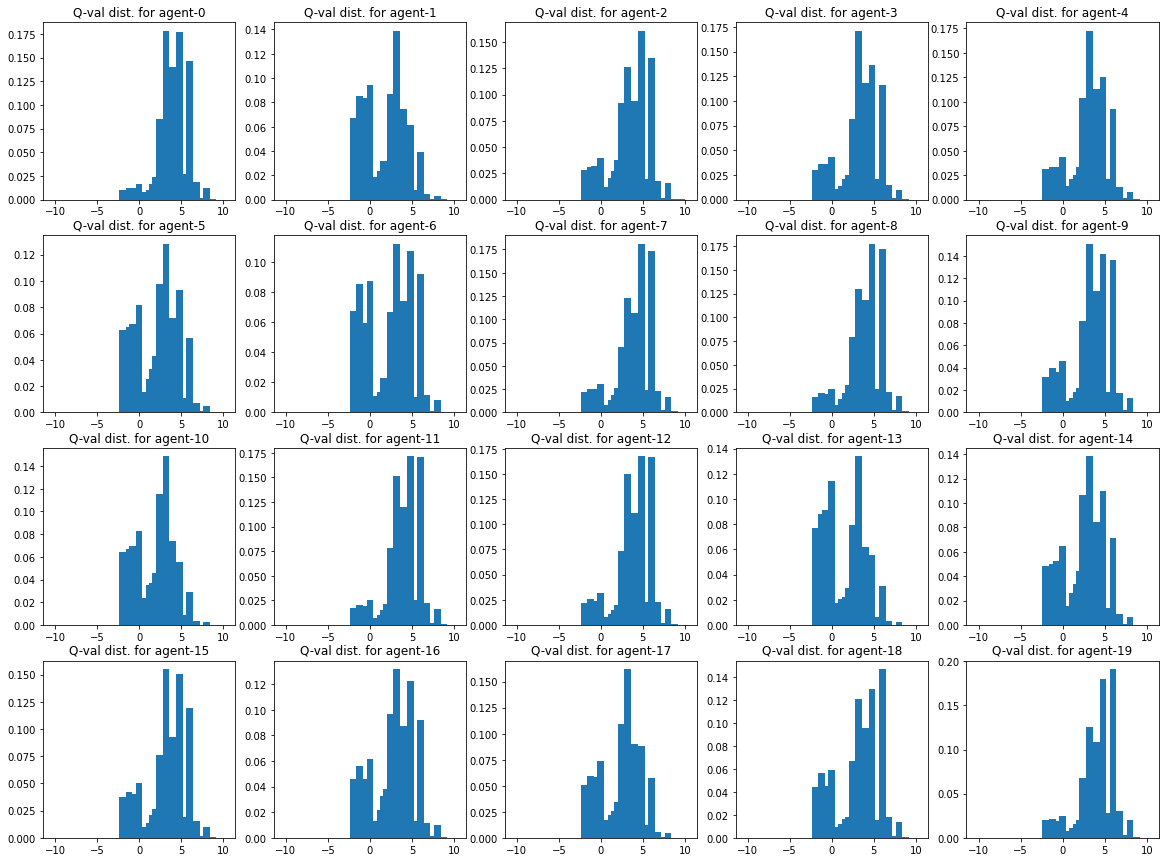

In [40]:
# plotting the distributions
z = np.linspace(-10,10, 51)
fig, ax = plt.subplots(figsize = (20,15), nrows = 4, ncols = 5)
ctr = 0
for row in range(4):
    for col in range(5):
        ax[row, col].bar(z, distributions[ctr])
        ax[row, col].set_title('Q-val dist. for agent-{}'.format(ctr))
        ctr+=1
plt.show()

In [9]:
env.close()

## Details of Learning Algorithm

For this task we implemented the [D4PG](https://arxiv.org/pdf/1804.08617.pdf) algorithm. 

As was the case with the D4PG paper, we chose to implement a categorical distibution for q-values with 51 'atoms' in the range ```[-10, 10]```.

Let us quickly describe the architecture of the actor and the critic networks. This are provided in the [Models](Models.py) module
 
The actor network: This has 4 layers which are as follows

 - layer 1: input features = 33, output features = 50, activation = selu
 - layer 2: input features = 50, output features = 25, activation = selu
 - layer 3: input features = 25, output features = 12, activation = selu
 - layer 4: input features = 12, output features = 4, activation = tanh
 
 The critic network: This has 4 layers which are 
 
 - layer 1: input features = 37, output features = 300, activation = selu
 - layer 2: input features = 300, output features = 200, activation = selu
 - layer 3: input features = 200, output features = 100, activation = selu
 - layer 4: input features = 100, output features = 51, activation = log_softmax
 
Now, one of the first things that we did different from the classic DDPG agent is that instead of adding the Ornstein-Uhlenbeck (OU) noise to the agent's actions, we simple added a small amount of Gaussion noise. This is based on the observation made in the D4PG paper that suggests that replacing the OU noise with the Gaussian noise has little to no effect on the performance of the agent. 

Secondly, instead of updating the agent based on a single TD step, we used the [N-step bootstrap](https://arxiv.org/abs/1602.01783). Just like in the D4PG paper we chose N = 5. 

Note that unlike the D4PG paper, we did not implement a priority reply. 

Finally, we used the following hyperparameters (almost all of these except the batch_size are based on the values in the D4PG paper):

- replay_buffer_size = 1e6
- replay_batch = 128
- lr_actor = 1e-4
- lr_critic = 1e-4
- epsilon = 0.3 
- tau = 1e-3
- gamma = 1
- update_interval = 3
- noise = Gaussion with a mean of 0 and std. dev. 1

Here ```epsilon``` is the factor by which we scale the Gaussian noise before adding it to the agent's actions.


We used the Adam optimizer for both the agent and the critic.

Our agent learned to solve the environment in 135 episodes. 

### Future Improvements

Our DDPG agent did a very good job at solving the environment. However, it will be interesting to experiment with techniques such as a prioritized replay buffer and applying the [distributional perpective](http://proceedings.mlr.press/v70/bellemare17a.html) to improve the agent as was done in the D4PG paper. Another interesting thing to try will be to modify the critic so as to learn the Advantage function rather than the Q-value function.

On the otherhand, it will also be very interesting to compare this performance with other RL strategies such as the [PPO](https://arxiv.org/pdf/1707.06347.pdf) and the [Asynchronous methods](https://arxiv.org/abs/1602.01783) such as A3C etc.